<a href="https://colab.research.google.com/github/adigapranava/ML_Project/blob/main/NEWS_ML_PROJECTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREATING A DATABASE 😎
Scrape data from [IndianExpress News Website](https://indianexpress.com/) for diffrent topic and save it to data base.

### Collect Sports 🤾🏻‍♂️

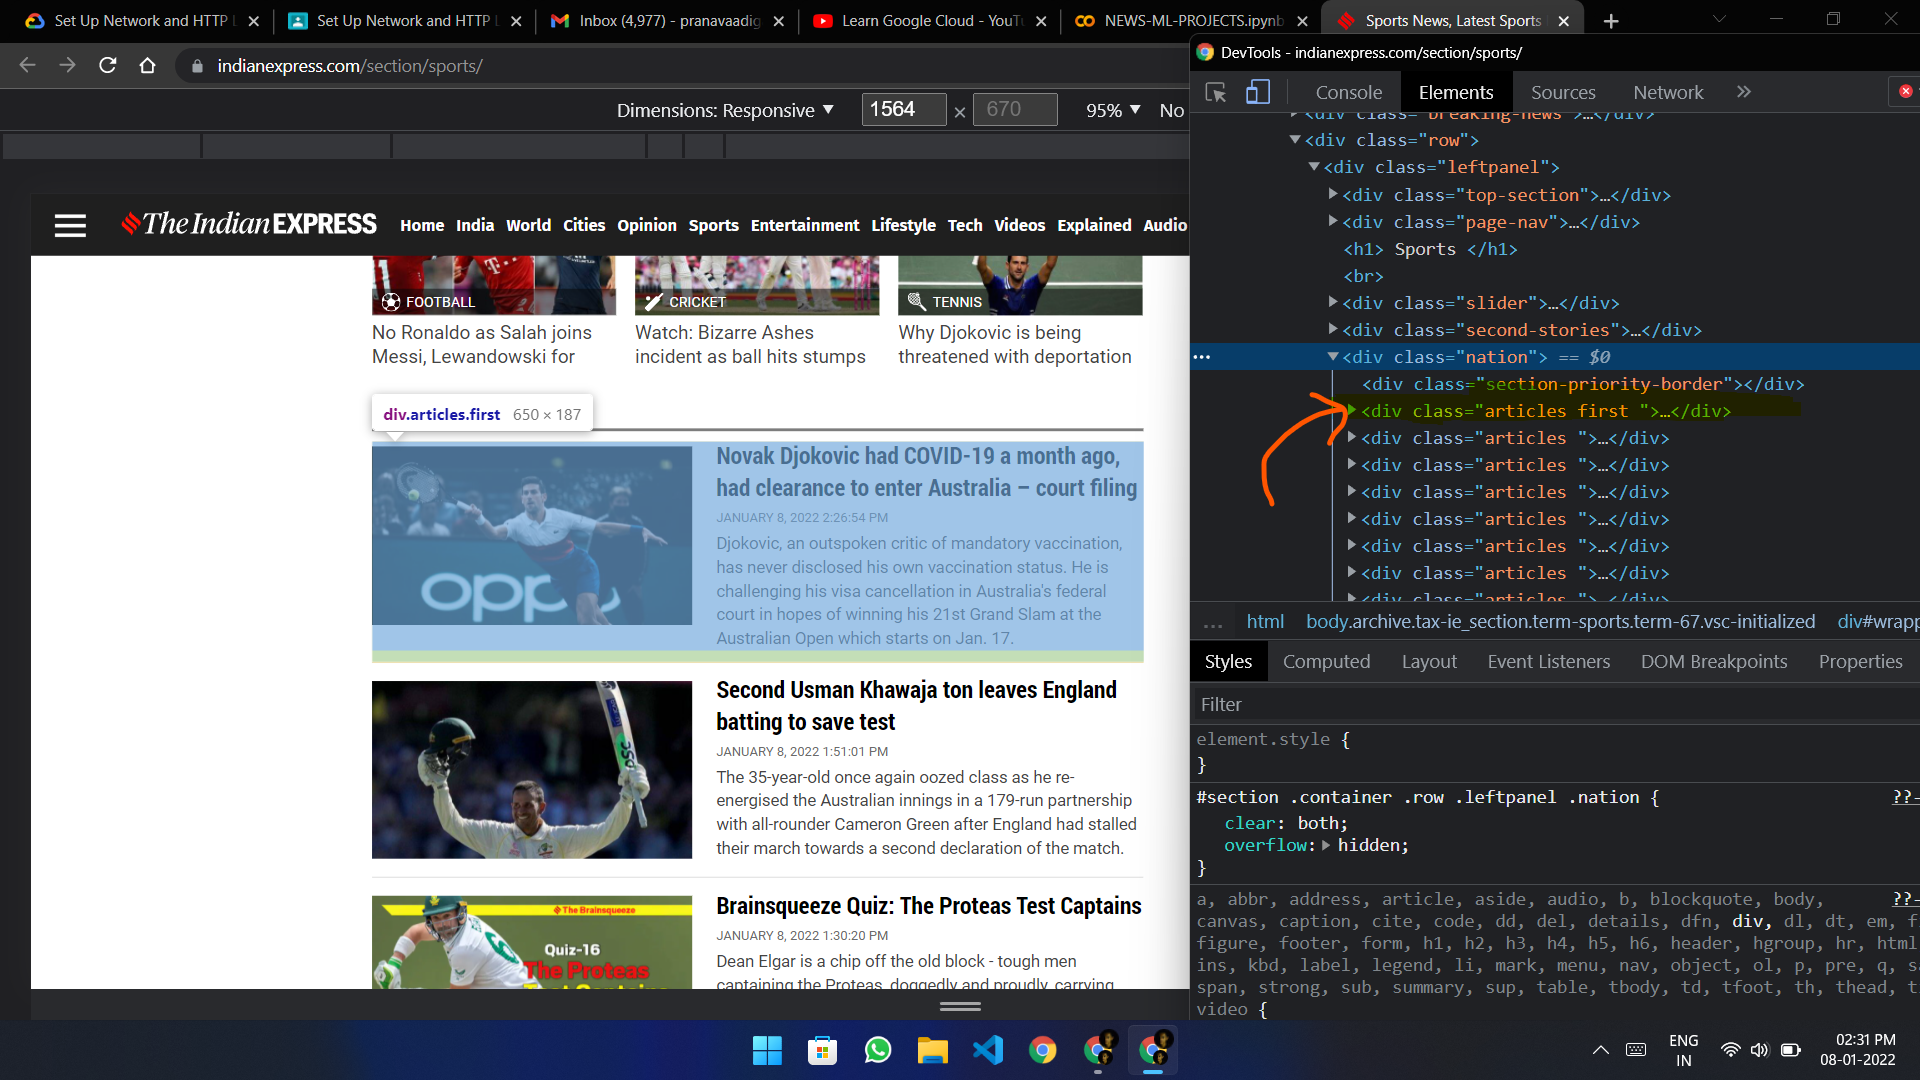

In [ ]:
def collectSportsNews(): 
  URL = "https://indianexpress.com/section/sports/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  selected = soup.find('div', attrs = {'class':'nation'}) 
  newss = selected.findAll('div', attrs={'class': 'articles'})
  news_list = []
  for news in newss:
    c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "SPORTS"))
  for i in range(2,100):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('div', attrs = {'class':'nation'}) 
    newss = selected.findAll('div', attrs={'class': 'articles'})
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "SPORTS"))
    connection.commit()
  print(news_list)

### Collect Entertainment Data 🎭

In [ ]:
def collectEntertainmentData(): 
  URL = "https://indianexpress.com/section/entertainment/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  selected = soup.find('div', attrs = {'class':'nation'}) 
  newss = selected.findAll('div', attrs={'class': 'articles'})
  news_list = []
  for news in newss:
    c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "ENTERTAINMENT"))
  for i in range(2,100):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('div', attrs = {'class':'nation'}) 
    newss = selected.findAll('div', attrs={'class': 'articles'})
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "ENTERTAINMENT"))
    connection.commit()
  print(news_list)

### Collect Tech Data 🧑🏻‍💻

In [ ]:
def collectTechData(): 
  URL = "https://indianexpress.com/section/technology/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  # selected = soup.find('ul', attrs = {'class':'article-list'}) 
  # newss = selected.findAll('li')
  # for news in newss:
  #   c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.findAll('a')[1].text, "TECH"))
  for i in range(100,106):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('ul', attrs = {'class':'article-list'}) 
    newss = selected.findAll('li')
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.findAll('a')[1].text, "TECH"))
    connection.commit()

### Get Business Data 👨🏻‍💼

In [ ]:
def collectBusinessData(): 
  URL = "https://indianexpress.com/section/business/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  selected = soup.find('div', attrs = {'class':'nation'}) 
  newss = selected.findAll('div', attrs={'class': 'articles'})
  news_list = []
  for news in newss:
    c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "BUSINESS"))
  for i in range(2,100):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('div', attrs = {'class':'nation'}) 
    newss = selected.findAll('div', attrs={'class': 'articles'})
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "BUSINESS"))
    connection.commit()
  print(news_list)

### Get Educational Data 📖

In [ ]:
def collectEducationData(): 
  URL = "https://indianexpress.com/section/education/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  selected = soup.find('div', attrs = {'class':'nation'}) 
  newss = selected.findAll('div', attrs={'class': 'articles'})
  news_list = []
  for news in newss:
    c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "EDUCATION"))
  for i in range(2,100):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('div', attrs = {'class':'nation'}) 
    newss = selected.findAll('div', attrs={'class': 'articles'})
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "EDUCATION"))
    connection.commit()
  print(news_list)

In [ ]:
def getAllInfoData():
  c.execute("SELECT Category , COUNT(*) FROM NEWS Group by Category")
  print(c.fetchall())

# Asli Game Shuru 🚩

In [2]:
import sqlite3
import requests
from bs4 import BeautifulSoup
import os

# if db not exist then ask and scrape 
if not (os.path.isfile("News.db")): 
  print("#"*50)
  choice = input("Can I scrape the data from net? Y-n: ")
  if (choice.lower() == "y" or choice.lower() ==" yes"):
    connection = sqlite3.connect("News.db")
    c = connection.cursor()
    c.execute("""CREATE TABLE NEWS(news_article text, category text)""")
    collectSportsNews()
    collectEntertainmentData()
    collectTechData()
    collectEducationData()
    collectBusinessData()
    getAllInfoData()
  else:
    pass
else:
  connection = sqlite3.connect("News.db")
  c = connection.cursor()

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Connect To Database And Create A DataFrame

In [4]:
sql_query = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM NEWS
                               ''', connection)

df = pd.DataFrame(sql_query, columns = ['news_article', 'category'])
# print (df)
# getAllInfoData()

### Exploring The DataSets 🔍

In [5]:
df.head()

,news_article,category
0,"Former Bengal captain Laxmi Ratan Shukla, who ...",SPORTS
1,"""Day 40 - Finished. Preet has just made histor...",SPORTS
2,Jan-Lennard Struff withstood 34 aces in a 7-6 ...,SPORTS
3,On a pitch on which Bangladesh and New Zealand...,SPORTS
4,"The matter was, however, resolved after talks ...",SPORTS


In [6]:
df.category.value_counts()

TECH             2500
SPORTS           2475
BUSINESS         2475
EDUCATION        2475
ENTERTAINMENT    2475
Name: category, dtype: int64

In [7]:
max(df["news_article"])

'🔴The top recruiters across the IITs have been American Express, Microsoft, EXL Analytics, Google, Uber, Reliance India Limited, Goldman Sachs, and Rakuten Mobile, among others.'

In [8]:
min(df["news_article"])

"\tThe Delhi University Teachers' Association had written to acting vice-chancellor Professor PC Joshi over the issue.\n"

In [9]:
df.isnull().sum()

news_article    0
category        0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lc = LabelEncoder()
df["categoryId"] = lc.fit_transform(df["category"])
df.sample(10)

,news_article,category,categoryId
11441,The institute has launched the Centre for Arti...,EDUCATION,1
4645,Shah Rukh Khan has remained out of action sinc...,ENTERTAINMENT,2
1857,"Jon Moxley, formerly known as Dean Ambrose in ...",SPORTS,3
10774,The minister noted that the learning levels of...,EDUCATION,1
5300,Meta announces a Live Chat feature for Faceboo...,TECH,4
8394,PM Modi CII Annual Meeting 2021: Prime Ministe...,BUSINESS,0
3750,Salman Khan posted a video on Instagram that s...,ENTERTAINMENT,2
1106,"Juventus confirmed that its president, Andrea ...",SPORTS,3
683,For a player of Nepomniachtchi’s tactical abi...,SPORTS,3
1384,"Lahiri, who shot 4-under 68 in the first round...",SPORTS,3


In [12]:
categoryDF = df[["category", "categoryId"]].drop_duplicates().sort_values(by="categoryId")
categoryDF

,category,categoryId
6930,BUSINESS,0
9405,EDUCATION,1
2475,ENTERTAINMENT,2
0,SPORTS,3
4950,TECH,4


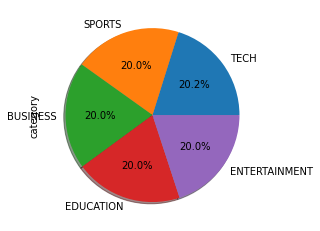

In [13]:
df["category"].value_counts().plot(kind="pie", shadow=True, autopct='%1.1f%%')

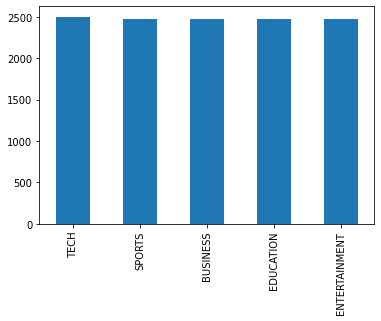

In [14]:
df["category"].value_counts().plot(kind="bar")

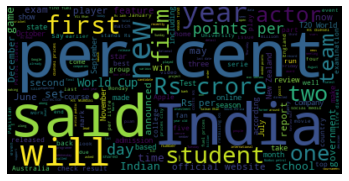

In [15]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df["news_article"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

### Cleaning the datasets 🧹

#### Remove Special Characters

In [16]:
"' '".join(set(" ".join(review for review in df["news_article"])))

'q\' \'é\' \'h\' \'C\' \'\t\' \'G\' \'$\' \'x\' \'H\' \'M\' \'b\' \'~\' \'£\' \'1\' \'*\' \'w\' \']\' \'t\' \'+\' \'Q\' \'°\' \'–\' \'(\' \'W\' \'d\' \'L\' \'{\' \'c\' \'#\' \'6\' \'ç\' \'”\' \'2\' \'%\' \'à\' \'k\' \'8\' \'7\' \'\'\' \'/\' \'v\' \'r\' \'\n\' \'F\' \'@\' \'s\' \',\' \'l\' \'.\' \'ý\' \'á\' \'—\' \'o\' \'f\' \'N\' \'🔴\' \'\xa0\' \'ó\' \'Y\' \'A\' \'i\' \'€\' \'J\' \'\u200b\' \'g\' \'U\' \'B\' \';\' \'R\' \'&\' \'Z\' \'₹\' \'í\' \'5\' \'3\' \'a\' \'j\' \'Á\' \'S\' \'D\' \'E\' \' \' \'|\' \'‘\' \'Ç\' \'4\' \'P\' \'p\' \'0\' \'"\' \'`\' \'…\' \'}\' \'z\' \'V\' \'[\' \'-\' \'_\' \'ñ\' \'m\' \'?\' \'9\' \'u\' \'K\' \'X\' \'’\' \'e\' \'n\' \'O\' \')\' \'“\' \'I\' \'!\' \':\' \'y\' \'T'

In [17]:
# REMOVE SPECIAL CHARs
import re

def filterNonAscii(text):
  split = re.split("\W+", text)
  return " ".join(split)

In [18]:
df["filter1"]= df["news_article"].apply(lambda x: filterNonAscii(x.lower()))

In [19]:
"' '".join(set(" ".join(review for review in df["filter1"])))

"4' 'q' 'é' 'h' '2' 'p' '0' 'à' 'k' 'x' '8' 'i' '7' 'b' 'g' 'z' '1' 'v' '_' 'r' 'ñ' 'w' 'm' 's' 't' '9' 'u' 'l' 'í' 'e' '5' 'ý' '3' 'á' 'd' 'a' 'j' 'o' 'n' 'f' ' ' 'c' 'y' '6' 'ç' 'ó"

#### Remove Stopwords

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
def remove_stopwords(text):
  stopwords = set(nltk.corpus.stopwords.words('english'))
  stopwords.update(["br", "href"])
  text=[word for word in text.split(" ") if word not in stopwords]
  return " ".join(text)

In [22]:
df["filter1"]= df["filter1"].apply(lambda x: remove_stopwords(x))
print(df["news_article"][4])
print("-"*170)
print(df["filter1"][4])

The matter was, however, resolved after talks between players' representatives, the England and Wales Cricket Board (ECB), Cricket Australia and the Australian government.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
matter however resolved talks players representatives england wales cricket board ecb cricket australia australian government 


#### Lemmatizing the Words
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.  lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

In [23]:
from nltk.stem import WordNetLemmatizer
def lemmitize(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text.split(" ")])

In [24]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [25]:
df["filter2"]= df["filter1"].apply(lambda x: lemmitize(x))
print(df["news_article"][4])
print("-"*170)
print(df["filter2"][4])

The matter was, however, resolved after talks between players' representatives, the England and Wales Cricket Board (ECB), Cricket Australia and the Australian government.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
matter however resolved talk player representative england wale cricket board ecb cricket australia australian government 


### Dividing The Datasets

In [26]:
sportsDF = df[df["category"]=="SPORTS"]
teachDF = df[df["category"]=="TECH"]
entertainmentDF = df[df["category"]=="ENTERTAINMENT"]
businessDF = df[df["category"]=="BUSINESS"]
educationDF = df[df["category"]=="EDUCATION"]

In [27]:
educationDF.sample(3)

,news_article,category,categoryId,filter1,filter2
10717,Assam Board SEBA HSLC 10th Result 2021: After ...,EDUCATION,1,assam board seba hslc 10th result 2021 result ...,assam board seba hslc 10th result 2021 result ...
9596,Spanish is considered to be one of the most sp...,EDUCATION,1,spanish considered one spoken languages world ...,spanish considered one spoken language world o...
10744,"CHSE Odisha Board +2 12th Science, Commerce Re...",EDUCATION,1,chse odisha board 2 12th science commerce resu...,chse odisha board 2 12th science commerce resu...


#### Wordcloud of SportsData

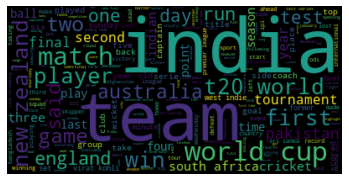

In [28]:
textt = " ".join(review for review in sportsDF["filter2"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('sports.png')
plt.show()

#### Wordcloud of Educational Data

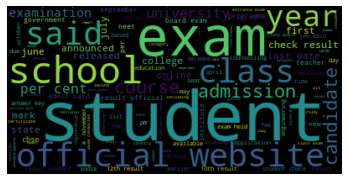

In [29]:
textt = " ".join(review for review in educationDF["filter2"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('edu.png')
plt.show()

#### Wordcloud of Business Data

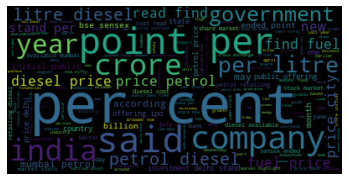

In [30]:
textt = " ".join(review for review in businessDF["filter2"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('business.png')
plt.show()

#### Wordcloud of TechData

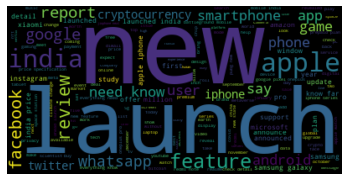

In [31]:
textt = " ".join(review for review in teachDF["filter2"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('tech.png')
plt.show()

#### Wordcloud of Entertainment Data

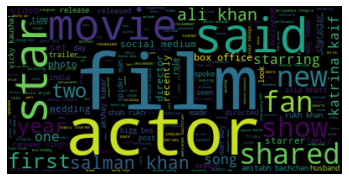

In [32]:
textt = " ".join(review for review in entertainmentDF["filter2"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('entertainment.png')
plt.show()

### Vectorizing the Text
In this step, we construct a vector, which would tell us whether a word in each sentence is a frequent word or not. If a word in a sentence is a frequent word, we set it as 1, else we set it as 0.

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(df["filter2"].values)
y = np.array(df.categoryId.values)
cv = CountVectorizer(max_features = 6000)
x = cv.fit_transform(df.filter2).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (12400, 6000)
y.shape =  (12400,)


In [ ]:
pickle.dump(cv, open('countVectorizer.sav', 'wb'))

### Train Test Split the Dataset

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10, shuffle = True)
print(len(x_train))
print(len(x_test))

8680
3720


In [35]:
y_train_sampling = np.unique(y_train, return_counts=True)[1]/len(y_train)*100
y_sampling = np.unique(y, return_counts=True)[1]/len(y)*100

In [36]:
np.sum(np.square(y_train_sampling-y_sampling))

0.15369831595489353

In [37]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
# print(len(x_train))
# print(len(x_test))

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df, df["categoryId"]):
    x_train = x[train_index]
    y_train = y[train_index]
    x_test = x[test_index]
    y_test = y[test_index]

In [38]:
y_train_strat_sampling = np.unique(y_train, return_counts=True)[1]/len(y_train)*100
y_train_strat_sampling

array([19.95391705, 19.96543779, 19.95391705, 19.96543779, 20.16129032])

In [39]:
np.sum(np.square(y_train_strat_sampling-y_sampling))

0.000132727388562077

### Training Diffrent Models

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB

In [41]:
def trainAModel(mdl):
  if(mdl == "logistic"):
    mdl = LogisticRegression()
  elif mdl == "SVC":
    mdl = SVC()
  elif mdl == "decissionTree":
    mdl = DecisionTreeClassifier()
  elif mdl == "randomForest":
    mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
  elif mdl == "knearestN":
    mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
  else:
    mdl = MultinomialNB(alpha=1.0,fit_prior=True)
  
  oneVsRest = OneVsRestClassifier(mdl)
  oneVsRest.fit(x_train, y_train)

  y_pred = oneVsRest.predict(x_test)
  accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
  print("Accuracy: "+ str(accuracy))
  print("Precission Score: "+ str(classification_report(y_true=y_test, y_pred=y_pred)))
  # print("Recall Score: "+ str(recall_score(y_test, y_pred, pos_label='positive' ,average='micro')))
  # print("F1 Score: "+ str(f1_score(y_test, y_pred, pos_label='positive' ,average='micro')))
  print("ConfusionMatrix: ")
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
  print()
  return oneVsRest

Accuracy: 93.44
Precission Score:               precision    recall  f1-score   support

           0       0.93      0.91      0.92       743
           1       0.97      0.93      0.95       742
           2       0.96      0.94      0.95       743
           3       0.94      0.92      0.93       742
           4       0.88      0.97      0.92       750

    accuracy                           0.93      3720
   macro avg       0.94      0.93      0.93      3720
weighted avg       0.94      0.93      0.93      3720

ConfusionMatrix: 

CPU times: user 34.3 s, sys: 1.72 s, total: 36 s
Wall time: 18.6 s


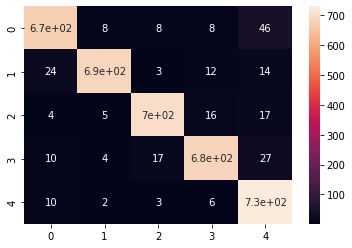

In [42]:
%%time
LogisticMdl = trainAModel("logistic")

In [43]:
import pickle
pickle.dump(LogisticMdl, open('logisticMdl.sav', 'wb'))

Accuracy: 81.96
Precission Score:               precision    recall  f1-score   support

           0       0.95      0.71      0.81       743
           1       0.96      0.85      0.90       742
           2       0.95      0.79      0.86       743
           3       0.90      0.79      0.84       742
           4       0.58      0.96      0.72       750

    accuracy                           0.82      3720
   macro avg       0.87      0.82      0.83      3720
weighted avg       0.87      0.82      0.83      3720

ConfusionMatrix: 

CPU times: user 7min 25s, sys: 516 ms, total: 7min 25s
Wall time: 7min 23s


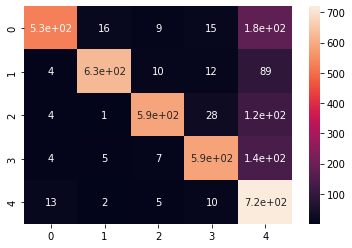

In [44]:
%%time
dTreeMdl = trainAModel("decissionTree")

In [45]:
pickle.dump(dTreeMdl, open('decissionTree.sav', 'wb'))

Accuracy: 93.82
Precission Score:               precision    recall  f1-score   support

           0       0.91      0.92      0.91       743
           1       0.95      0.95      0.95       742
           2       0.94      0.97      0.96       743
           3       0.94      0.95      0.94       742
           4       0.94      0.90      0.92       750

    accuracy                           0.94      3720
   macro avg       0.94      0.94      0.94      3720
weighted avg       0.94      0.94      0.94      3720

ConfusionMatrix: 

CPU times: user 3.15 s, sys: 299 ms, total: 3.45 s
Wall time: 2.97 s


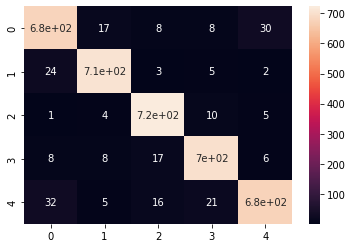

In [46]:
%%time
naiveMdl = trainAModel("SVsC")

In [47]:
pickle.dump(naiveMdl, open('naiveMdl.sav', 'wb'))

Accuracy: 94.09
Precission Score:               precision    recall  f1-score   support

           0       0.93      0.94      0.93       743
           1       0.97      0.93      0.95       742
           2       0.96      0.94      0.95       743
           3       0.95      0.92      0.94       742
           4       0.90      0.97      0.93       750

    accuracy                           0.94      3720
   macro avg       0.94      0.94      0.94      3720
weighted avg       0.94      0.94      0.94      3720

ConfusionMatrix: 

CPU times: user 18min 32s, sys: 1.55 s, total: 18min 33s
Wall time: 18min 28s


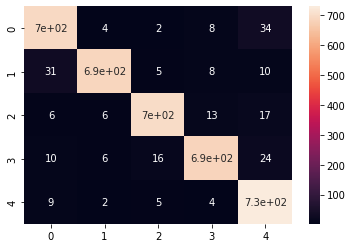

In [48]:
%%time
svcMdl = trainAModel("SVC")

In [49]:
pickle.dump(svcMdl, open('svcMdl.sav', 'wb'))

<table style="font-size:20px">
  <tr>
    <th>Model</th>
    <th>Accuracy</th>
    <th>Time Taken</th>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>93.44%</td>
    <td>18.6s</td>
  </tr>
  <tr>
    <td>Decission Tree</td>
    <td>81.96%</td>
    <td>7 min 23s</td>
  </tr>
  <tr>
    <td>Naive Model</td>
    <td>93.82%</td>
    <td>2.97s</td>
  </tr>
  <tr>
    <td>SVC</td>
    <td>94.09%</td>
    <td>18 min 28s</td>
  </tr>
</table>

In [ ]:
mdl = svcMdl

### Classifing The News 🔮

In [ ]:
def PredictNewsType(news):
  if type(news) == str:
    news = [news]
  toBePredicted = pd.DataFrame(news)
  toBePredicted = toBePredicted[0]
  toBePredicted = toBePredicted.apply(lambda x: filterNonAscii(x.lower()))
  toBePredicted = toBePredicted.apply(lambda x: remove_stopwords(x))
  toBePredicted = toBePredicted.apply(lambda x: lemmitize(x))
  outs = mdl.predict(cv.transform(toBePredicted).toarray())
  outs_prob = mdl.predict_proba(cv.transform(toBePredicted).toarray())
  ans= []
  for i, out in enumerate(outs):
    ans.append((categoryDF.set_index("categoryId").iloc[out]["category"], np.round(max(outs_prob[i])*100,2)))
  return ans

In [ ]:
PredictNewsType(["Before going to Spain, Loh had trained in Dubai with Tokyo Olympics champion Viktor Axelsen and Sen and said the young Indian is an extremely talented player.",
                 "The second Test saw quite a few heated exchanges between the players and with a fit-again Kohli back for the all-important game, Elgar feels more verbal blows will be traded at the Newlands.",
                 "China’s Chang’e 5 lunar probe finds first on-site evidence of water on moon’s surface",
                 "Candidates can check the detailed schedule on the official website of MCC- mcc.nic.in. The registration process for the counselling will begin on January 12.",
                 "In its pre-Budget memorandum, the Hotel Association of India (HAI) said policy interventions are imperative for the sector's survival and its early and quick rebound to normalcy.",
                 "Oh Young Soo was nominated alongside Billy Crudup and Mark Duplass in “The Morning Show,” Kieran Culkin in “Succession,” and Brett Goldstein in “Ted Lasso.”",
                 ])

[('SPORTS', 96.7),
 ('SPORTS', 97.88),
 ('TECH', 91.99),
 ('EDUCATION', 99.0),
 ('BUSINESS', 82.3),
 ('ENTERTAINMENT', 41.84)]